<a href="https://colab.research.google.com/github/yeagerca/Cameron-Yeager-Machine-Learning-Projects/blob/main/yeager_Project3_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
#Suppress FutureWarning. Source: https://stackoverflow.com/a/46721064
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


In [10]:
data = pd.read_csv('http://nrvis.com/data/mldata/breast-cancer-wisconsin_wdbc.csv')
X = data.iloc[:, 2:] #Gather all data from column index 2 and onward.
#Scale the data
#X = (X - np.mean(X)) / np.std(X) #Standard Normal Distribution (mean 0, std 1)
X = (X - np.min(X)) / (np.max(X) - np.min(X)) #Normalization

In [11]:
#Train the model
K = 2
km = KMeans(n_clusters=K)
km.fit(X)
ykm = km.fit_predict(X)
#print("km:", km)
#print("ykm:", ykm)

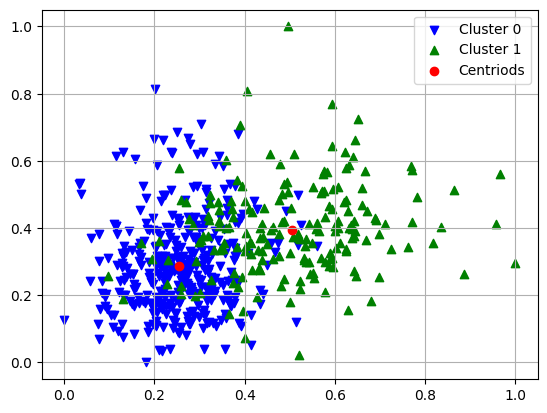

In [12]:
X = np.array(X)
ykm = np.array(ykm)

plt.scatter(X[ykm == 0,0], X[ykm == 0,1], c='blue', marker='v', label='Cluster 0')
plt.scatter(X[ykm == 1,0], X[ykm == 1,1], c='green', marker='^', label='Cluster 1')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', marker='o', label='Centriods')
plt.legend()
plt.grid()
plt.show()

In [13]:
#How many of each were in the original dataset?
diagnosis = data.groupby(['diagnosis (M=malignant; B=benign)'])
print(diagnosis.size())

diagnosis (M=malignant; B=benign)
B    357
M    212
dtype: int64


In [14]:
newx = pd.DataFrame(X)
#print(newx)
#newy = pd.DataFrame(ykm) #produces the same result
#print(newy)

#How many of each are in the kmeans dataset?
km_diag = newx.groupby(km.labels_)
#km_diag2 = newy.groupby(km.labels_)
print(km_diag.size())
#print(km_diag2.size())

0    380
1    189
dtype: int64


189 380 normalized

189 380 standardized

131 438 unscaled


In [15]:
n = 189+380
wrong_scaled = (212 - 189) + (380 - 357)
wrong_unscaled = (212 - 131) + (438 - 380)
accuracy_scaled = 1 - wrong_scaled/n
accuracy_unscaled = 1 - wrong_unscaled/n
print(accuracy_scaled)
print(accuracy_unscaled)

0.9191564147627417
0.7557117750439367


# Report

1) In the original dataset 357 data points are labeled Benign and 212 are labeled Malignant.

2) In the KMeans clustering results 189 datapoints fell under Cluster-0 and 380 fell under Cluster-1. When the dataset was not scaled those numbers were 131 and 438 respectively.

3) The data points from the KMeans clustering are comparable to those from the original dataset; 46/569 failures, or 91.92% accuracy (75.57% when not scaled). When corellating these results, Cluster-0 represents Malignant cases and Cluster-1 respresents Benign cases.

While the results are close enough to see a correlation, they are by no means accurate enough to be relied upon for deciding medical treatment. A more effective prediction was made at 97.6% accuracy in assignment 2 using SVM regression with an RBF kernel and hyperparameter C=10 on the same dataset. This KMeans clustering model is worse than the best models from assignment 2.